In [1]:
# opening(열림) 연산 : 침식 연산 이후 팽창 연산 적용, 침식 연산 후 원본 영상과의 차이를 줄이는 효과
# closing(닫힘) 연산 : 팽창 연산 이후 침식 연산 적용, 좁은 간격으로 분리되어 있던 두 객체가 연결되는 효과
import cv2
import numpy as np
img = cv2.imread("d:/data/images/winter.jpg")

In [2]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
height, width = gray.shape
out = np.zeros((height + 2, width + 2), dtype=np.uint8)
out2 = np.zeros((height + 2, width + 2), dtype=np.uint8)
out[1:1 + height, 1:1+width] = gray.copy()
opened = np.zeros_like(gray)
closed = np.zeros_like(gray)

#침식 연산과 팽창 연산
for i in range(height):
    for j in range(width):
        temp = out[i:i+3, j:j+3]
        opened[i][j] = np.min(temp)
        closed[i][j] = np.max(temp)
out[1:1 + height, 1:1+width] = opened.copy()
out2[1:1 + height, 1:1 + width] = closed.copy()

#첫번째와 반대로 침식 연산과 팽창 연산
for i in range(height):
    for j in range(width):
        temp = out[i:i+3, j:j+3]
        temp2 = out2[i:i + 3, j:j + 3]
        opened[i][j] = np.max(temp)
        closed[i][j] = np.min(temp2)

#제로 패딩 제거
opened = opened[1:-1, 1:-1]
closed = closed[1:-1, 1:-1]

#함수를 사용하는 방법
array = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
opening = cv2.dilate(cv2.erode(gray, array), array)
closing = cv2.erode(cv2.dilate(gray, array), array)

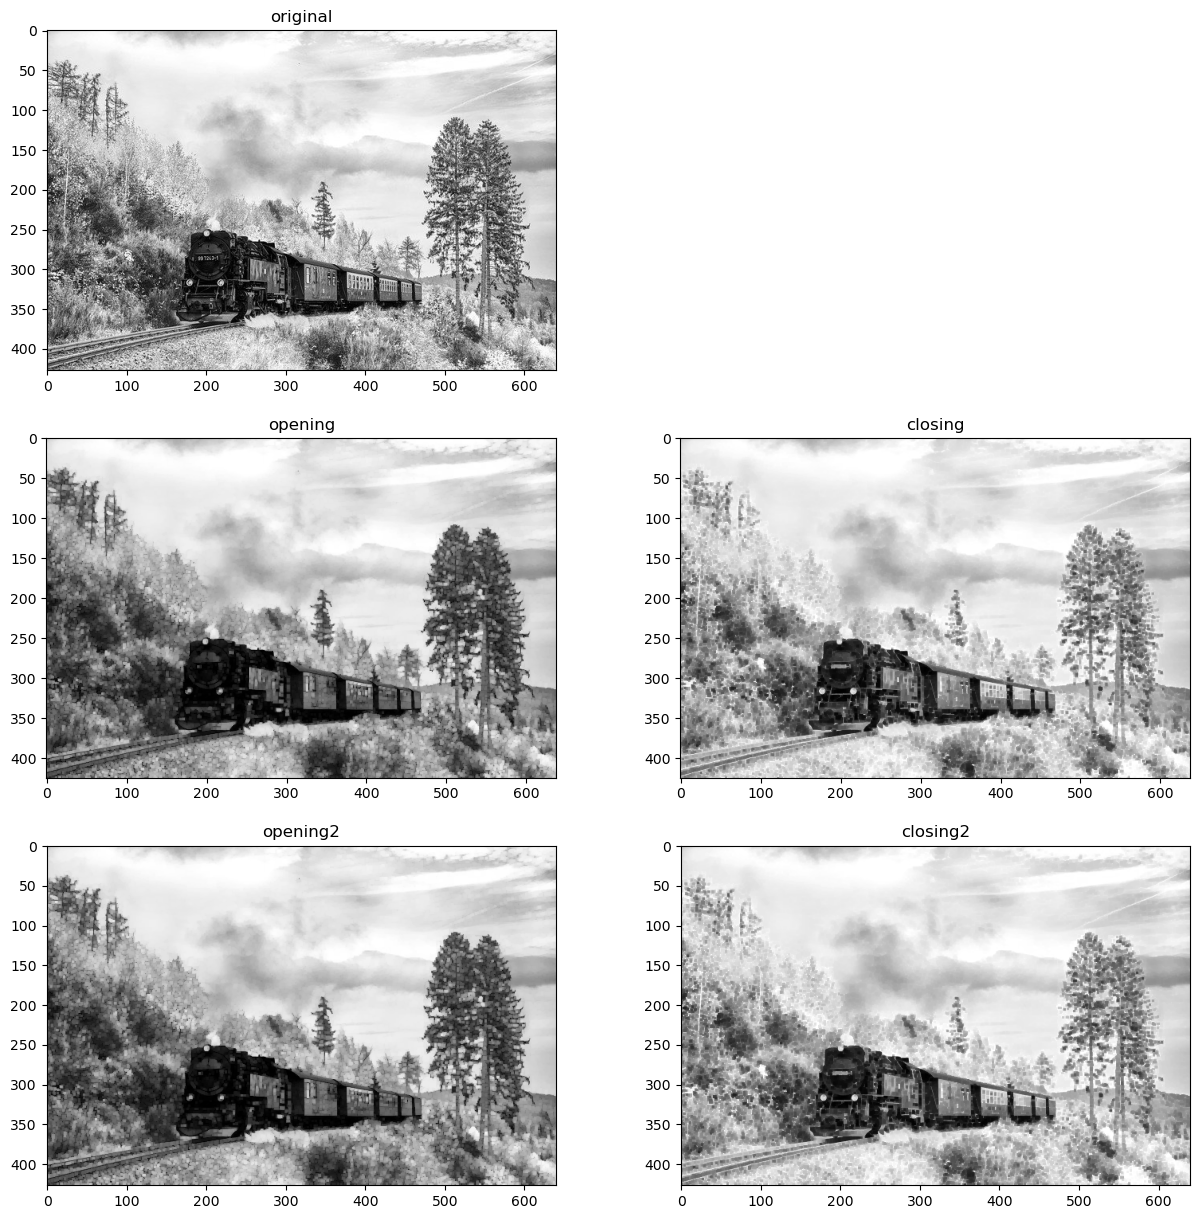

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.subplot(321)
plt.imshow(gray, cmap='gray') # 원본 이미지
plt.title('original')
plt.subplot(323)
plt.imshow(opened, cmap='gray') # 열림 연산(반복문 사용) - 침식후 팽창
plt.title('opening')
plt.subplot(324)
plt.imshow(closed, cmap='gray') # 닫힘 연산(반복문 사용) - 팽창후 침식
plt.title('closing')
plt.subplot(325)
plt.imshow(opening, cmap='gray') # 열림 연산(함수 사용)
plt.title('opening2')
plt.subplot(326)
plt.imshow(closing, cmap='gray') # 닫힘 연산(함수 사용)
plt.title('closing2')
plt.show()
#기차의 라이트를 확인
#열림 연산 : 라이트가 흐려짐
#닫힘 연산 : 라이트가 밝아짐